<a href="https://colab.research.google.com/github/Nawapon19/ml_practice/blob/main/K_Means_clustering_on_the_handwritten_digits_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-Means clustering on the handwritten digits data**

In [56]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import time

from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA

In [57]:
# load the datasets
digits_data = load_digits().data

In [58]:
digits_data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

First handwritten digit data:  [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


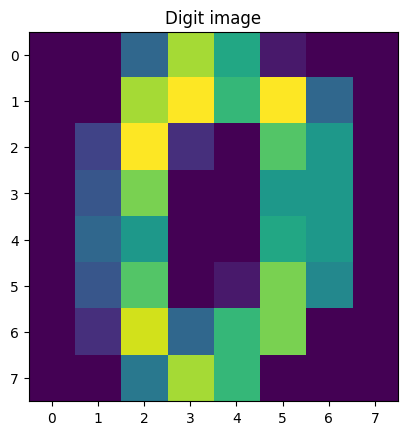

In [59]:
# print how the data of the first digit looks like
# and then display its’s respective image
print("First handwritten digit data: ", digits_data[0])

sample_digit = digits_data[0].reshape(8, 8)

plt.imshow(sample_digit)
plt.title("Digit image")
plt.show()

In [60]:
# scale the data from 0-255 to -1-1
# easing the computation and avoiding super large number
scaled_data = scale(digits_data)
print(scaled_data)

[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]


In [61]:
# set up the target variable
Y = load_digits().target
print(Y)

[0 1 2 ... 8 9 8]


In [62]:
# define k-means clustering model
# use a random initial cluster
# init: initial cluster points
# n_clusters: number of clusters
# n_init: number of iterations
k = 10
kmeans_cluster = KMeans(init = "random", n_clusters = k, n_init = 10, random_state = 0)

In [63]:
# use k-means++
# chooses the initial clusters far away from each other
k = 10
kmeans_cluster = KMeans(init = "k-means++", n_clusters = k, n_init = 10, random_state = 0)

In [64]:
# define function for model evaluation
def bench_k_means(estimator, name, data):
  initial_time = time.time()
  estimator.fit(data)
  print("Initial-cluster: ", name)
  print("Time taken {0:0.3f}".format(time.time() - initial_time))
  print("Homogeneity: {0:0.3f}".format(metrics.homogeneity_score(Y, estimator.labels_)))
  print("Completeness: {0:0.3f}".format(metrics.completeness_score(Y, estimator.labels_)))
  print("V_measure: {0:0.3f}".format(metrics.v_measure_score(Y, estimator.labels_)))
  print("Adjusted random: {0:0.3f}".format(metrics.adjusted_rand_score(Y, estimator.labels_)))
  print("Adjusted mutual info: {0:0.3f}".format(metrics.adjusted_mutual_info_score(Y, estimator.labels_)))
  print("Silhouette: {0:0.3f}\n".format(metrics.silhouette_score(data, estimator.labels_, metric='euclidean', sample_size = 300)))

In [65]:
# use the defined function to evaluate the k means algorithms
# random initial clusters
kmeans_cluster = KMeans(init = "random", n_clusters = k, n_init = 10, random_state = 0)
bench_k_means(estimator = kmeans_cluster, name = "random", data = digits_data)

# k-means++ initial clusters
kmeans_cluster = KMeans(init = "k-means++", n_clusters = k, n_init = 10, random_state = 0)
bench_k_means(estimator = kmeans_cluster, name = "k-means++", data = digits_data)

Initial-cluster:  random
Time taken 0.088
Homogeneity: 0.739
Completeness: 0.748
V_measure: 0.744
Adjusted random: 0.666
Adjusted mutual info: 0.741
Silhouette: 0.185

Initial-cluster:  k-means++
Time taken 0.501
Homogeneity: 0.742
Completeness: 0.751
V_measure: 0.747
Adjusted random: 0.669
Adjusted mutual info: 0.744
Silhouette: 0.177



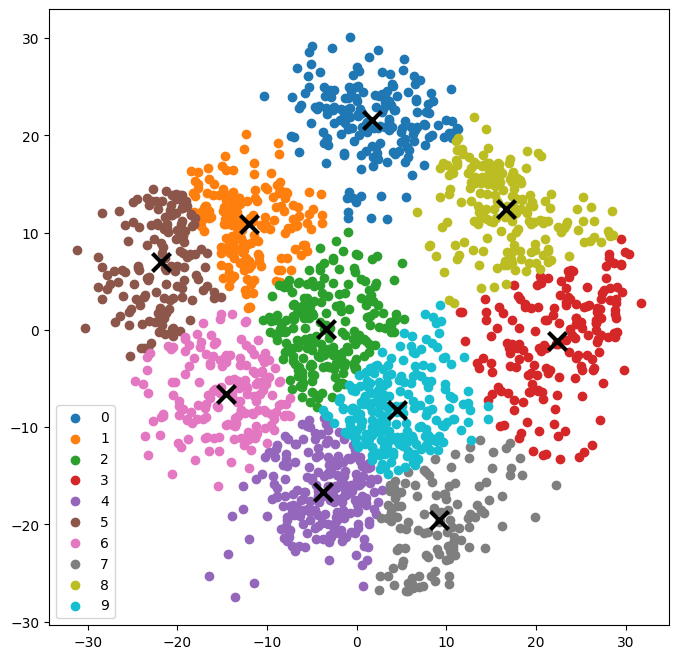

In [66]:
# visualize using scatterplot
# reduce the large dataset using Principal Component Analysis (PCA)
# fit the data to k-means++ model

# reduce the dataset and fit to the model
pca = PCA(2)
reduced_data = pca.fit_transform(digits_data)

kmeans_cluster.fit(reduced_data)

# calculate the centroids for marking the plot
centroids = kmeans_cluster.cluster_centers_
label = kmeans_cluster.fit_predict(reduced_data)
unique_labels = np.unique(label)

# plot the clusters
plt.figure(figsize = (8, 8))
for i in unique_labels:
  plt.scatter(reduced_data[label == i, 0], reduced_data[label == i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 169, linewidth = 3, color = 'k', zorder = 10)
plt.legend()
plt.show()